In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [8]:
df=pd.read_excel("/content/drive/MyDrive/datasets/ca11-03homes.xls")
df

,Obs,Price,SqFt,BedRooms,Baths,Garage,Zip
0,1,52900,932,1,1.0,0,4
1,2,61500,780,3,1.0,0,5
2,3,62000,1500,3,1.0,0,9
3,4,62900,760,2,1.0,0,4
4,5,64900,900,2,1.0,0,4
...,...,...,...,...,...,...,...
499,500,490000,3900,4,3.5,3,5
500,501,535000,3331,5,3.5,3,6
501,502,549000,3615,4,4.5,3,5
502,503,625000,4840,4,4.0,3,6


In [9]:
df.shape

(504, 7)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Obs       504 non-null    int64  
 1   Price     504 non-null    int64  
 2   SqFt      504 non-null    int64  
 3   BedRooms  504 non-null    int64  
 4   Baths     504 non-null    float64
 5   Garage    504 non-null    int64  
 6   Zip       504 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 27.7 KB


In [11]:
df.describe()

,Obs,Price,SqFt,BedRooms,Baths,Garage,Zip
count,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000,504.000000
mean,252.500000,157734.424603,1825.251984,3.307540,2.116071,1.809524,6.442460
std,145.636534,87192.536492,772.270118,0.651243,0.748703,0.724074,1.828823
min,1.000000,52000.000000,672.000000,1.000000,1.000000,0.000000,1.000000
25%,126.750000,104900.000000,1300.000000,3.000000,1.500000,2.000000,5.000000
50%,252.500000,129900.000000,1680.000000,3.000000,2.000000,2.000000,6.000000
75%,378.250000,184900.000000,2213.250000,4.000000,2.500000,2.000000,9.000000
max,504.000000,830000.000000,8805.000000,5.000000,6.500000,3.000000,9.000000


In [12]:
df.corr()

,Obs,Price,SqFt,BedRooms,Baths,Garage,Zip
Obs,1.000000,0.785454,0.743282,0.534419,0.718812,0.790183,-0.117462
Price,0.785454,1.000000,0.884152,0.556914,0.773812,0.513906,-0.143554
SqFt,0.743282,0.884152,1.000000,0.649451,0.779095,0.474612,-0.182280
BedRooms,0.534419,0.556914,0.649451,1.000000,0.576983,0.331060,-0.049378
Baths,0.718812,0.773812,0.779095,0.576983,1.000000,0.557945,-0.023789
Garage,0.790183,0.513906,0.474612,0.331060,0.557945,1.000000,-0.021805
Zip,-0.117462,-0.143554,-0.182280,-0.049378,-0.023789,-0.021805,1.000000


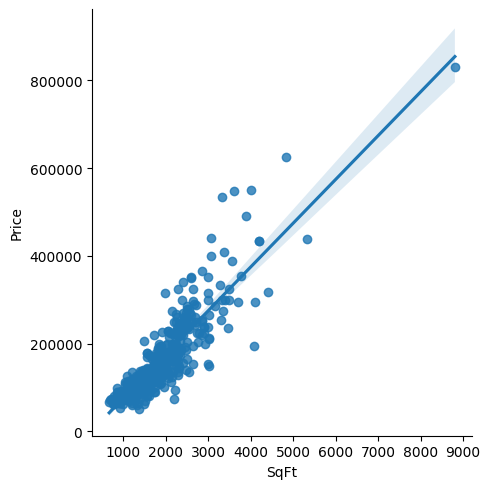

In [18]:
sns.lmplot(x="SqFt",y="Price",data=df)

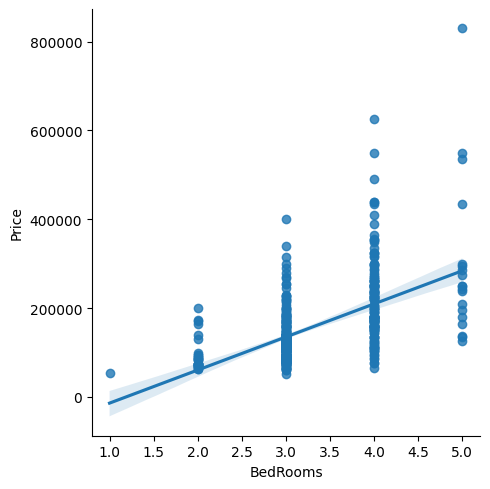

In [19]:
sns.lmplot(x="BedRooms",y="Price",data=df)

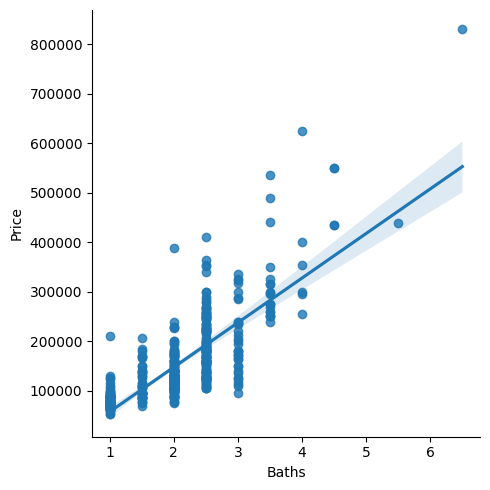

In [20]:
sns.lmplot(x="Baths",y="Price",data=df)

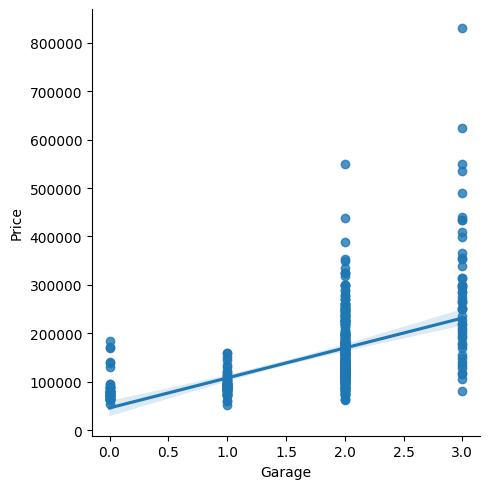

In [21]:
sns.lmplot(x="Garage",y="Price",data=df)

<Axes: xlabel='SqFt', ylabel='Price'>

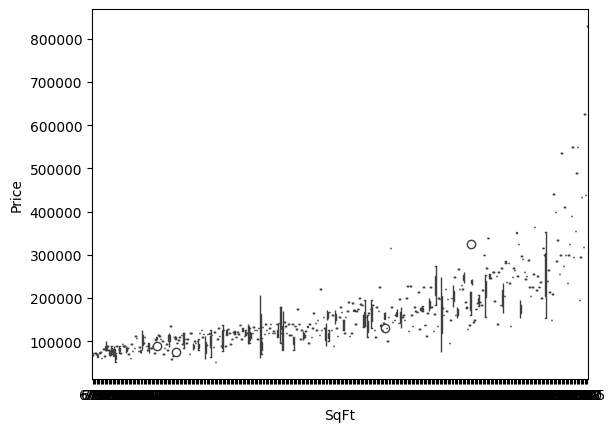

In [24]:
sns.boxplot(x="SqFt",y="Price",data=df)

<Axes: xlabel='BedRooms', ylabel='Price'>

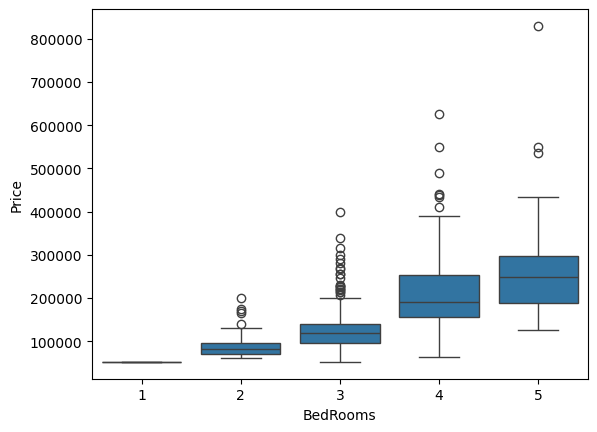

In [25]:
sns.boxplot(x="BedRooms",y="Price",data=df)

<Axes: xlabel='Baths', ylabel='Price'>

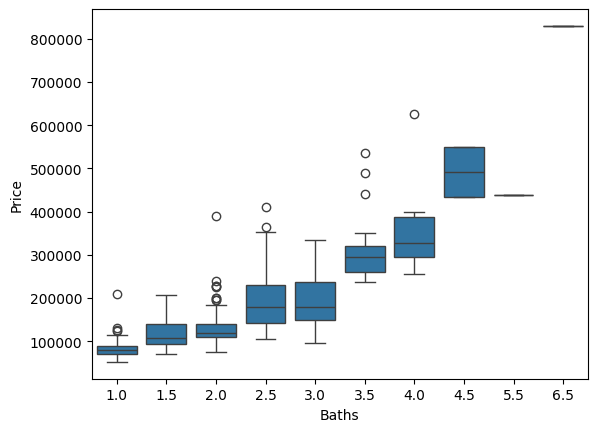

In [26]:
sns.boxplot(x="Baths",y="Price",data=df)

<Axes: xlabel='Garage', ylabel='Price'>

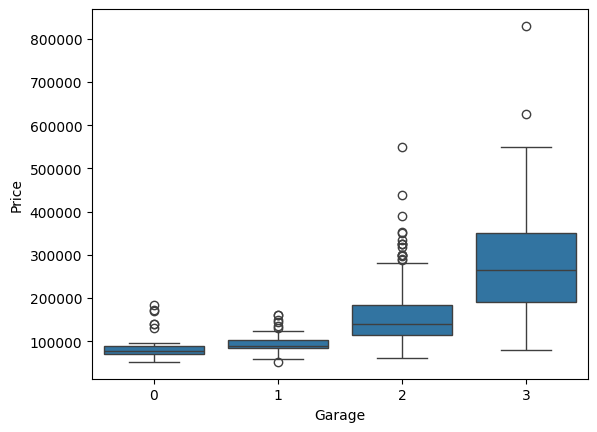

In [27]:
sns.boxplot(x="Garage",y="Price",data=df)

In [28]:
q1=df["Price"].quantile(0.25)
q1

104900.0

In [33]:
q3=df["Price"].quantile(0.75)
q3

184900.0

In [34]:
iqr=q3-q1
iqr

80000.0

In [35]:
ul=q3+(iqr*1.5)
ll=q1-(iqr*1.5)
(ll,ul)

(-15100.0, 304900.0)

In [36]:
upper=np.where(df["Price"]>ul)
upper

(array([444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 488, 489, 490,
        491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503]),)

In [37]:
lower=np.where(df["Price"]<ll)
lower

(array([], dtype=int64),)

In [38]:
upper[0]

array([444, 445, 446, 447, 448, 449, 450, 451, 452, 453, 488, 489, 490,
       491, 492, 493, 494, 495, 496, 497, 498, 499, 500, 501, 502, 503])

In [39]:
df.drop(upper[0],inplace=True)

<Axes: xlabel='Baths', ylabel='Price'>

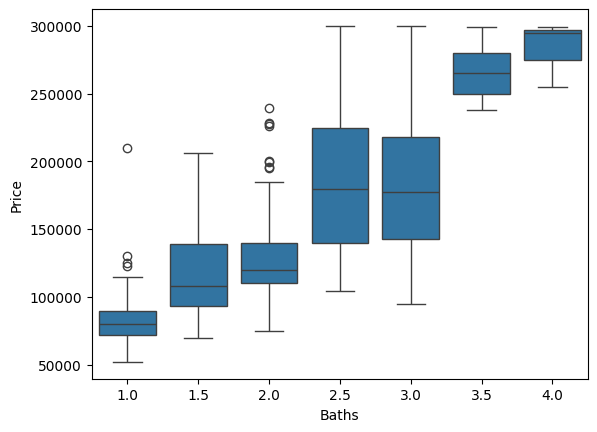

In [41]:
sns.boxplot(x="Baths",y="Price",data=df)

<Axes: xlabel='BedRooms', ylabel='Price'>

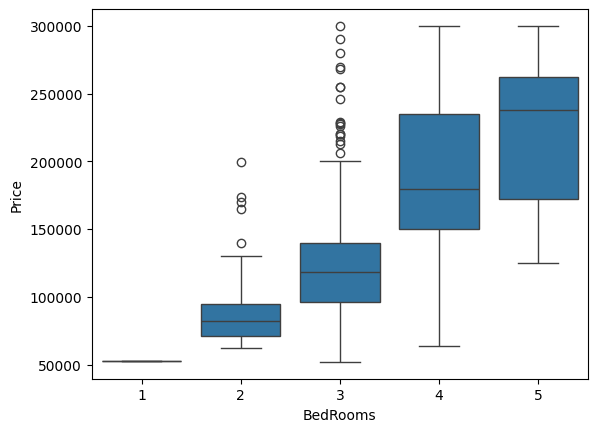

In [42]:
sns.boxplot(x="BedRooms",y="Price",data=df)

In [43]:
x=df[["SqFt","BedRooms","Baths"]]
x1=df[["SqFt","BedRooms","Baths","Garage"]]
y=df["Price"]

In [44]:
from sklearn.model_selection import train_test_split
x_tr,x_ts,y_tr,y_ts=train_test_split(x,y,test_size=0.25,random_state=0)
x1_tr,x1_ts,y_tr,y_ts=train_test_split(x1,y,test_size=0.25,random_state=0)

In [46]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr1=LinearRegression()

In [47]:
lr.fit(x_tr,y_tr)
lr1.fit(x1_tr,y_tr)

LinearRegression()

In [48]:
y_pred=lr.predict(x_ts)
y_pred

array([ 76515.39548538,  67807.62127903, 109047.91364282, 116383.78404345,
       184153.2842405 , 107385.7918485 , 122766.33173364, 188915.91650663,
       102820.8702018 ,  75385.15266524, 325385.07975474, 120682.76620307,
       123342.16107398, 145371.1881364 ,  97612.5156979 , 123674.58543285,
        73390.60651205, 169613.88783198, 165735.23076354, 170457.4006553 ,
       155165.88014755, 166378.66362073, 209547.01726594, 104106.6172711 ,
       200375.59295307, 162078.56281603, 215667.11346082, 124760.87788683,
       155032.910404  , 191732.5596226 , 164473.76219574,  65146.48241222,
       239311.44931044, 217460.46100279, 183353.72178334, 113967.79415401,
       171319.95999245, 124849.89726422, 170079.28193439, 153792.23234594,
        59430.52743565, 113192.51019836, 149138.29132184, 151531.74670566,
       103130.76005504,  57035.32805594, 176972.91808903, 117358.52261443,
       226479.86905828, 158421.89486853, 138901.36506471, 152194.8514275 ,
       147142.00117276,  

In [49]:
y1_pred=lr1.predict(x1_ts)
y1_pred

array([ 64956.17553803,  76112.54719246, 112614.4657975 , 121595.16050612,
       183413.85230251, 111005.99641819, 127771.68292266, 186497.21277765,
       108470.05037098,  63862.4163601 , 327005.26152127, 123873.75145265,
       126447.30245954, 149646.86648124, 101548.19646787, 126768.9963354 ,
        71901.82775713, 161611.91342966, 165946.40968219, 170160.06461702,
       155362.1463274 , 160362.74288589, 208700.06062312,  91656.76723453,
       199112.51344455, 162407.77704771, 213910.43173418, 129701.84617783,
       155233.46877705, 190748.47267215, 164369.57485152,  53954.24498357,
       235266.00435824, 216001.97676623, 182996.18510284, 117375.53516025,
       171350.86679666, 131669.61439268, 172031.85950806, 155914.46148845,
        48066.71221636, 108537.32464566, 161380.32187859, 153726.94313259,
       106888.31480717,  46104.91441255, 176465.26458391, 120656.81269404,
       222848.62074999, 158869.14441324, 141148.17774746, 154724.72898671,
       149834.98207362,  

In [50]:
from sklearn.metrics import r2_score
r2_score(y_ts,y_pred)

0.7815170875449201

In [51]:
r2_score(y_ts,y1_pred)

0.7754809333754459

In [54]:
lr.score(x_ts,y_ts)

0.7815170875449201

In [55]:
lr1.score(x1_ts,y_ts)

0.7754809333754459

In [59]:
lr.predict([[780,3,1]])

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([57035.32805594])